In [1]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [2]:
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/03/08/1488985028.h5'

In [3]:
h = katdal.open(filename)

In [4]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2017/03/08/1488985028.h5 (version 3.0)
Observer: Audrey  Experiment ID: 20170308-0020
Description: 'Generic AR1 phaseup'
Observed from 2017-03-08 16:57:12.504 SAST to 2017-03-08 16:59:04.457 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m001,m008,m012,m014,m015,m018,m025,m031,m062,m063  20      220
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m018', 'm008', 'm001', 'm014', 'm015', 'm063', 'm062', 'm025', 'm031', 'm012']
  spw=0
-------------------------------------------------------------------------------
Shape: (28 dumps, 4096 channels, 220 correlation products) => Size:

In [5]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  3
    cal_product_K  ---  3
    cal_product_G  ---  6


In [6]:
np.set_printoptions(precision=4,suppress=True)

In [7]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V136">
[['m001', 'm008', 'm012', 'm014', 'm015', 'm018', 'm025', 'm031', 'm062', 'm063']]
['m001' 'm008' 'm012' 'm014' 'm015' 'm018' 'm025' 'm031' 'm062' 'm063']


# Delays

In [8]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [9]:
k_array.shape #Times,Pols,Antennas

(3, 2, 10)

In [10]:
# print delays (if there are few delays)
print 'POL 0: ', k_0
print 'POL 1: ', k_1

POL 0:  [[  -27.5157    87.8399 -1200.1217     2.8158   -21.032  -1158.4045     0.
   1121.7333   -14.2139   -14.0864]
 [   -0.0136    -0.0047    -0.0395    -0.008     -0.035     -0.0009    -0.
   1088.6253     0.0285     0.0011]
 [  -27.4984    87.882  -1200.0906     2.8443   -21.0706 -1158.4227     0.
      9.2806   -14.2306   -14.1022]]
POL 1:  [[ -121.1367    88.8051 -1196.1622    -9.0005    27.4102 -1158.3679     0.
    481.8279   -14.1638   -14.1415]
 [   -0.0116     0.0162    -0.0303    -0.0228    -0.0318     0.0023    -0.
  -2157.2535     0.0424     0.0091]
 [ -121.1146    88.8648 -1196.1219    -8.9629    27.3876 -1158.3778    -0.
      9.3064   -14.1546   -14.1253]]


In [11]:
print labels

['m001' 'm008' 'm012' 'm014' 'm015' 'm018' 'm025' 'm031' 'm062' 'm063']


In [12]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

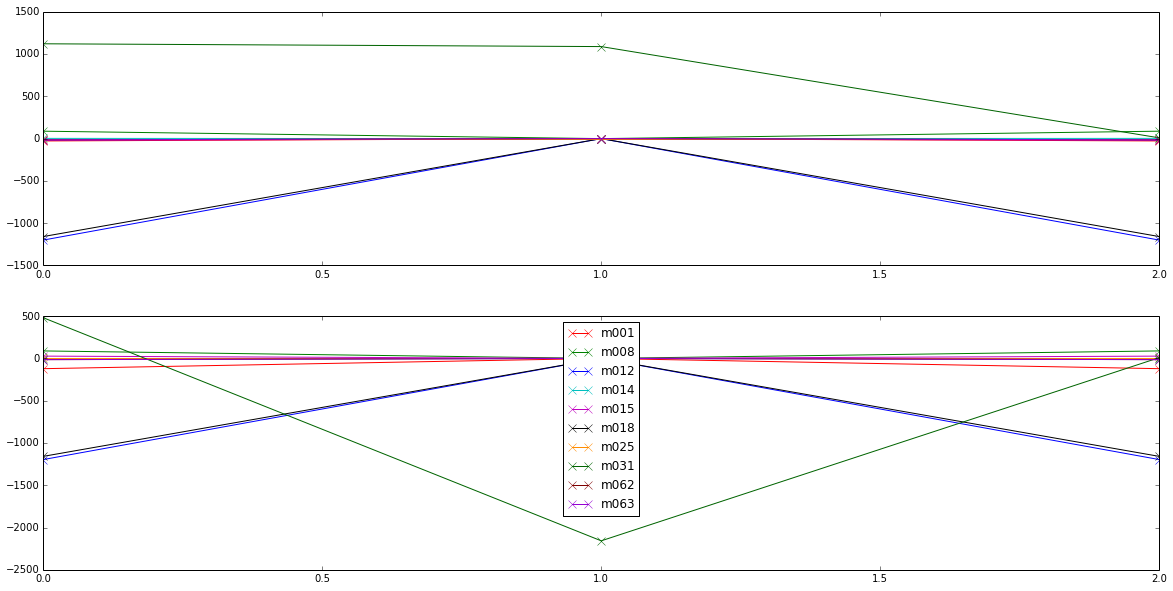

In [13]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [14]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(6, 2, 10)


In [15]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 1.9079  2.0167  2.2804  1.9402  2.2624  1.4835  1.9233  0.0016  2.3449
  2.1396]
[ 2.2218  1.8984  1.894   1.7903  2.6689  1.97    1.8411  0.0014  2.4002
  2.4234]


In [16]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 1.907   2.0222  2.262   1.952   2.2504  1.4712  1.9283  2.7415  2.3367
  2.1468]
[ 2.0026  1.7231  1.7169  1.6332  2.414   1.769   1.7195  1.6017  2.1814
  2.2079]


In [17]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[    0.9995     1.0027     0.9919     1.006      0.9947     0.9917
     1.0026  1745.4812     0.9965     1.0034]
[    0.9013     0.9077     0.9065     0.9122     0.9045     0.898      0.934
  1128.1446     0.9088     0.9111]


In [18]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[-136.8759 -177.7789  -26.6931 -115.0539   27.81   -125.0506    0.
 -143.4311   11.4248   77.2578]
[-111.7362  151.1664  140.0343 -100.4274 -134.4274 -104.7537    0.
 -109.7005   91.632    43.4299]


In [19]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[-137.6992  170.68    -27.3114 -119.2513   45.1544 -109.4429   -0.       28.298
   22.9692   83.7201]
[-112.9396  137.1482  138.0648 -105.3813 -129.5732  -90.0245    0.       -7.726
   98.4047   43.8446]


In [20]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[  -0.8233  348.4589   -0.6183   -4.1974   17.3444   15.6077   -0.
  171.7292   11.5444    6.4623]
[  -1.2035  -14.0182   -1.9695   -4.9539    4.8542   14.7292    0.
  101.9745    6.7728    0.4147]


/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


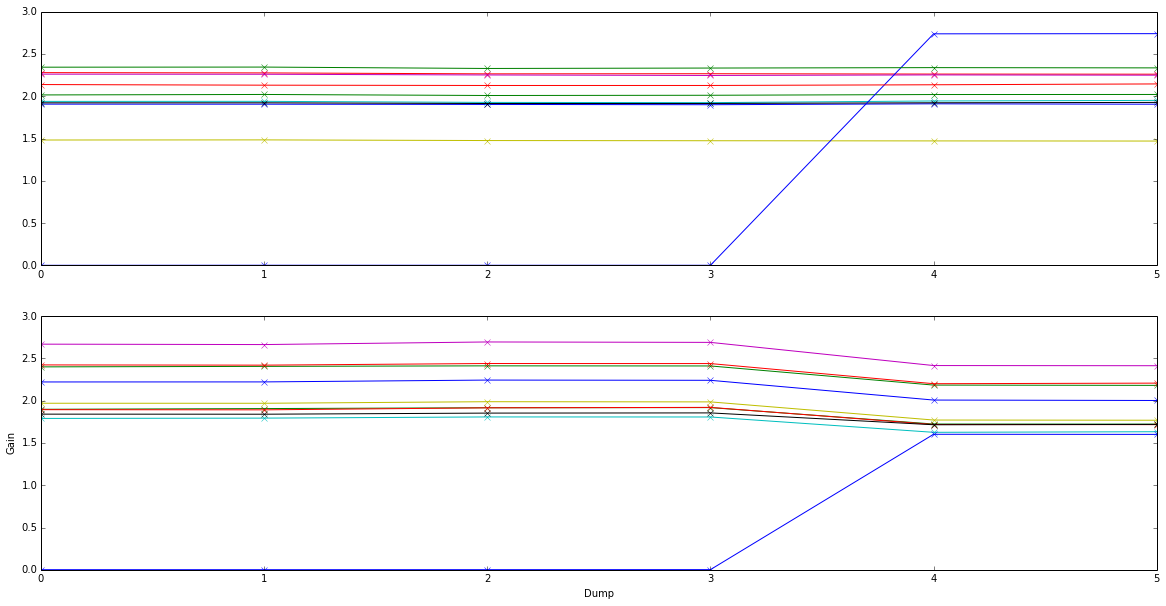

In [21]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

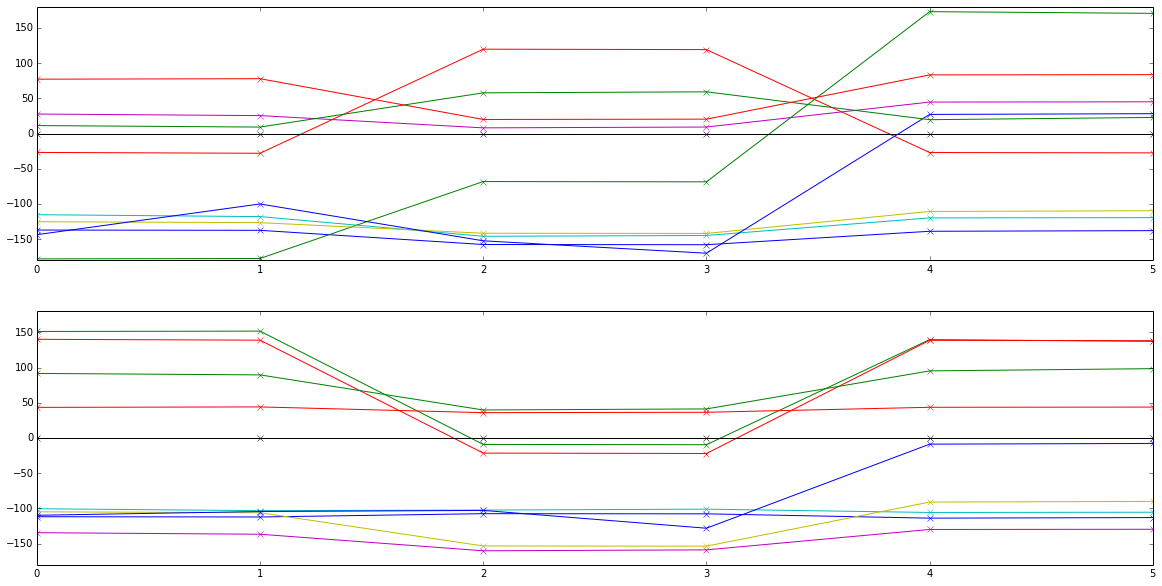

In [22]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [23]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(3, 4096, 2, 10)


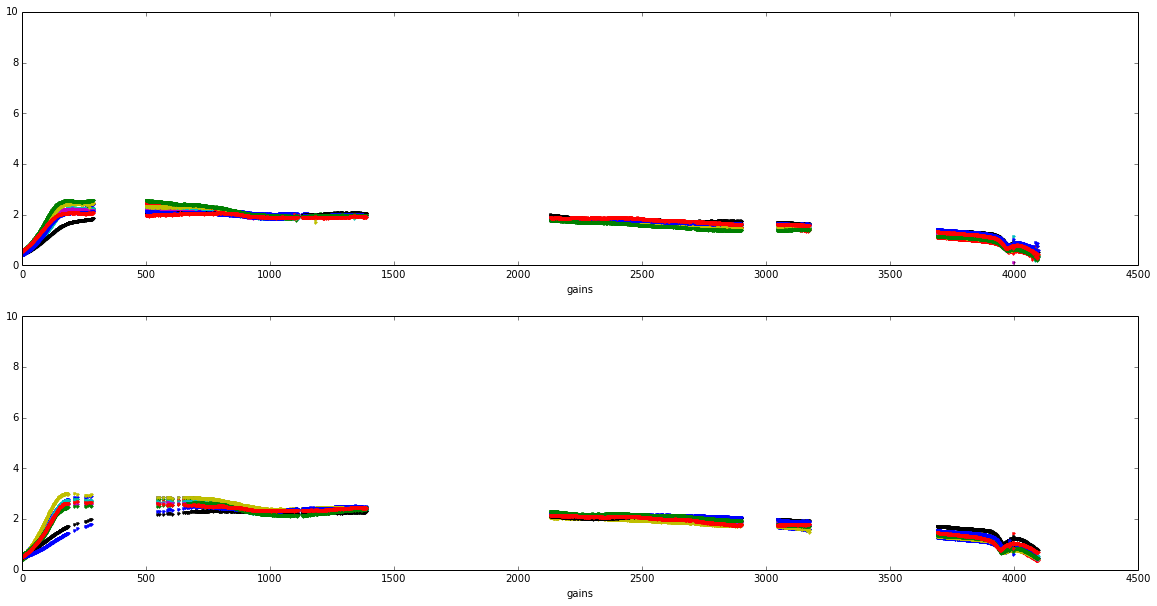

In [24]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

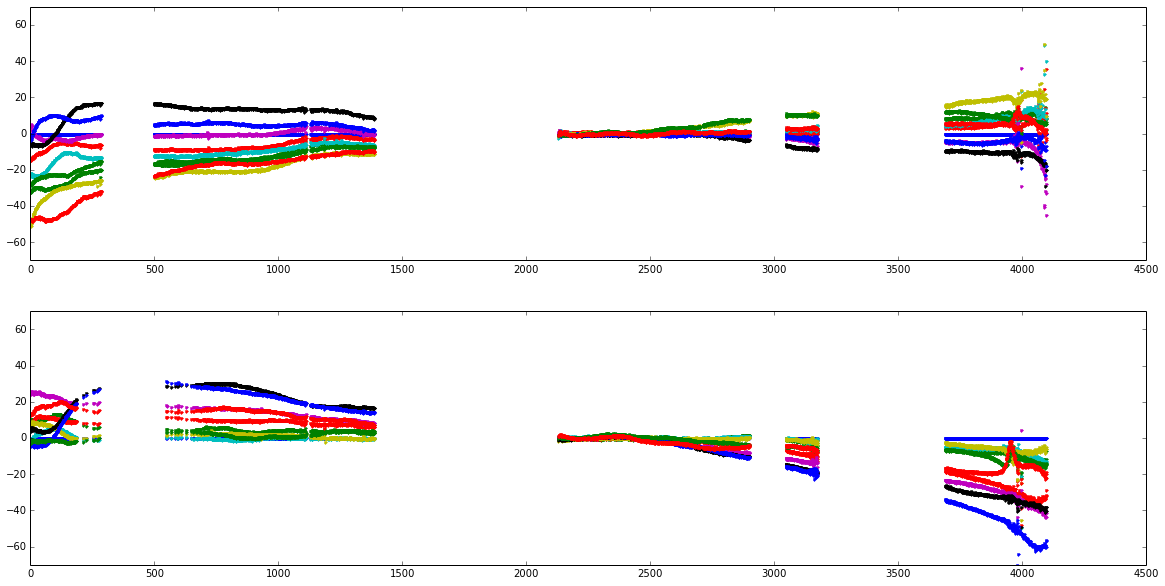

In [25]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
ax[1].set_ylim([-70,70]);

In [26]:
b_array.shape
# Time,channels,pols,antennas

(3, 4096, 2, 10)

In [27]:
#last bandpass
b_0_1 = b_array[0,:,0,8]
b_1_1 = b_array[0,:,1,8]
b_1_1.shape
print a_array[:,8]

['m062']


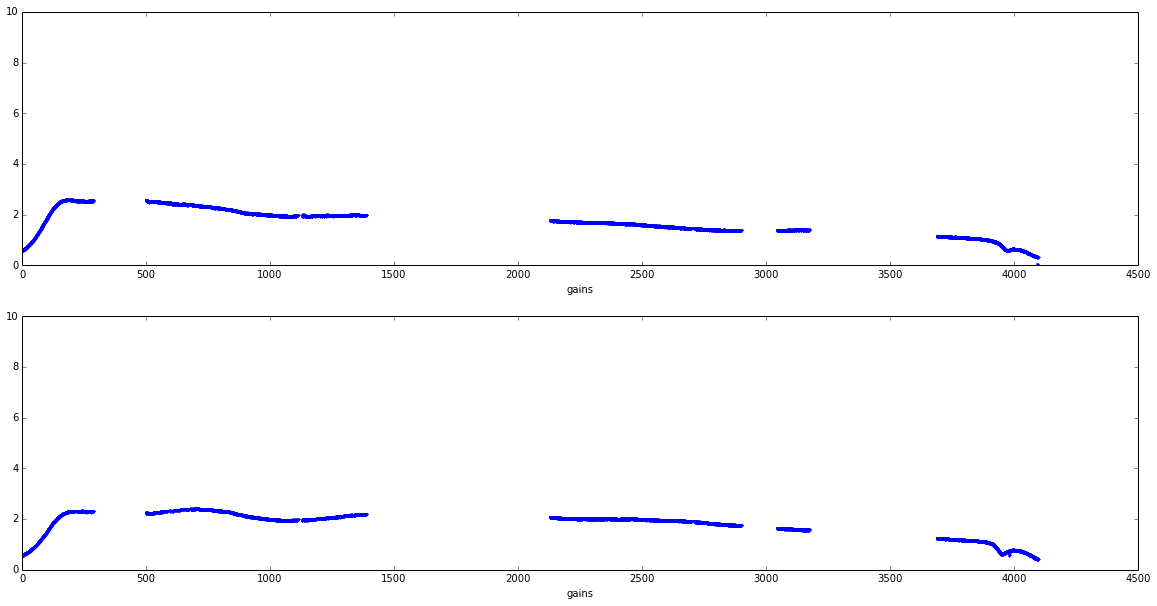

In [28]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

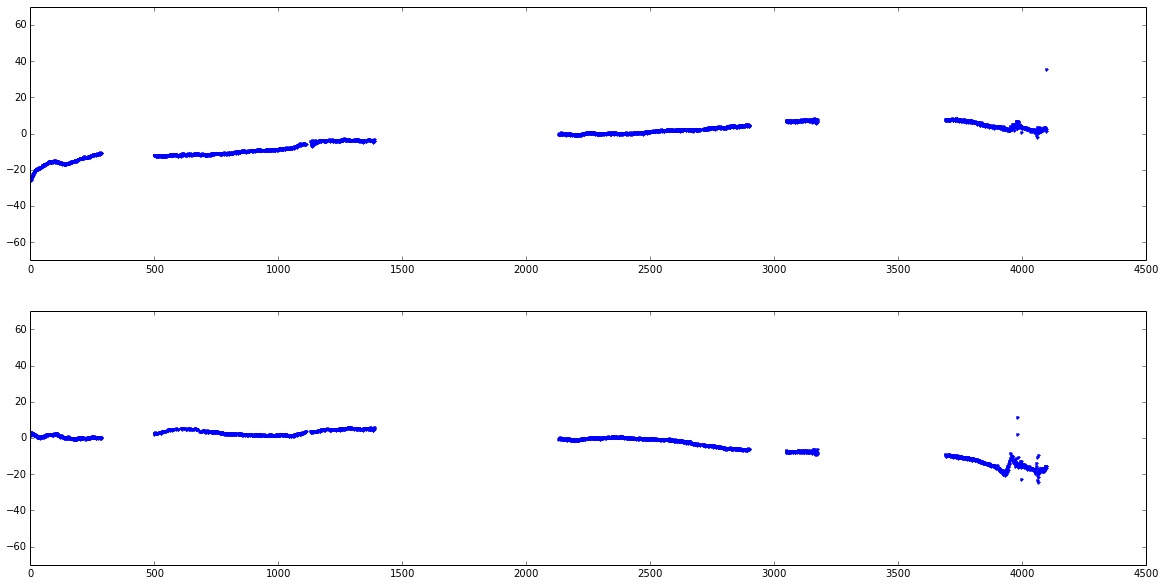

In [29]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);